Importing used libraries

In [16]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import math


 Data Preprocessing & Cleaning

Shape of X after handling missing values: (297, 13)
Shape of y after handling missing values: (297, 1)

Missing values in X after removal:
0

Missing values in y after removal:
0

First 5 rows of features (X) after One-Hot Encoding:
   age  trestbps  chol  thalach  oldpeak  sex_1  cp_2  cp_3  cp_4  fbs_1  \
0   63       145   233      150      2.3      1     0     0     0      1   
1   67       160   286      108      1.5      1     0     0     1      0   
2   67       120   229      129      2.6      1     0     0     1      0   
3   37       130   250      187      3.5      1     0     1     0      0   
4   41       130   204      172      1.4      0     1     0     0      0   

   restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1.0  ca_2.0  ca_3.0  \
0          0          1        0        0        1       0       0       0   
1          0          1        1        1        0       0       0       1   
2          0          1        1        1        0       0       1       0  

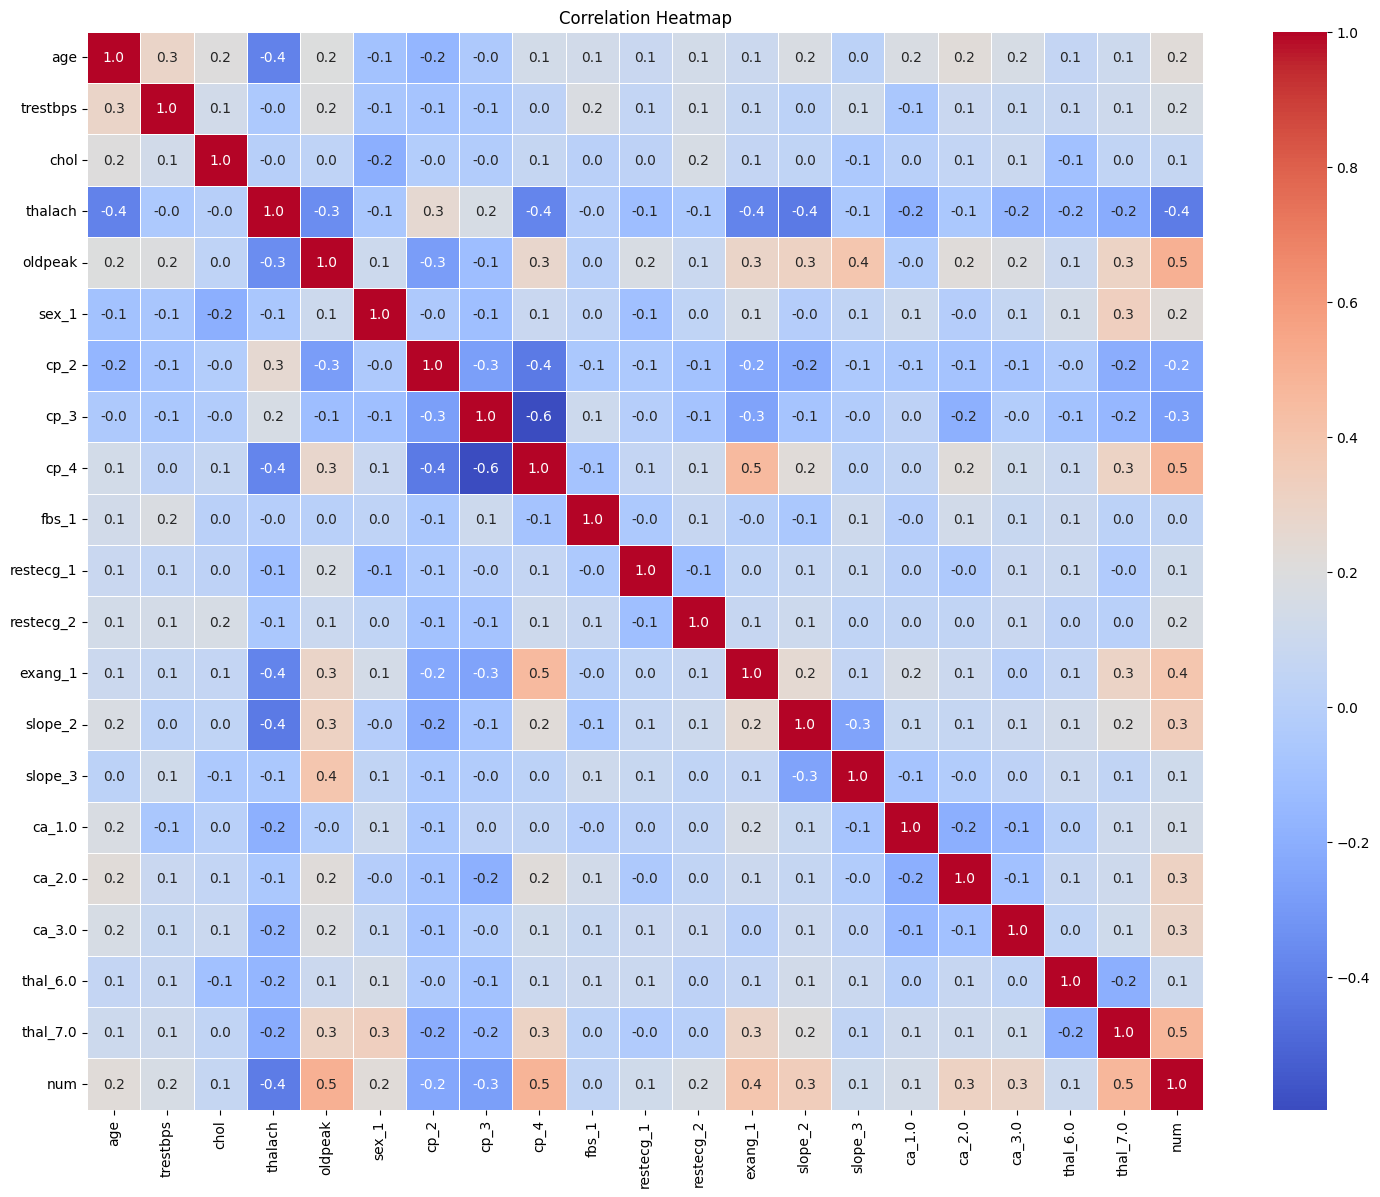

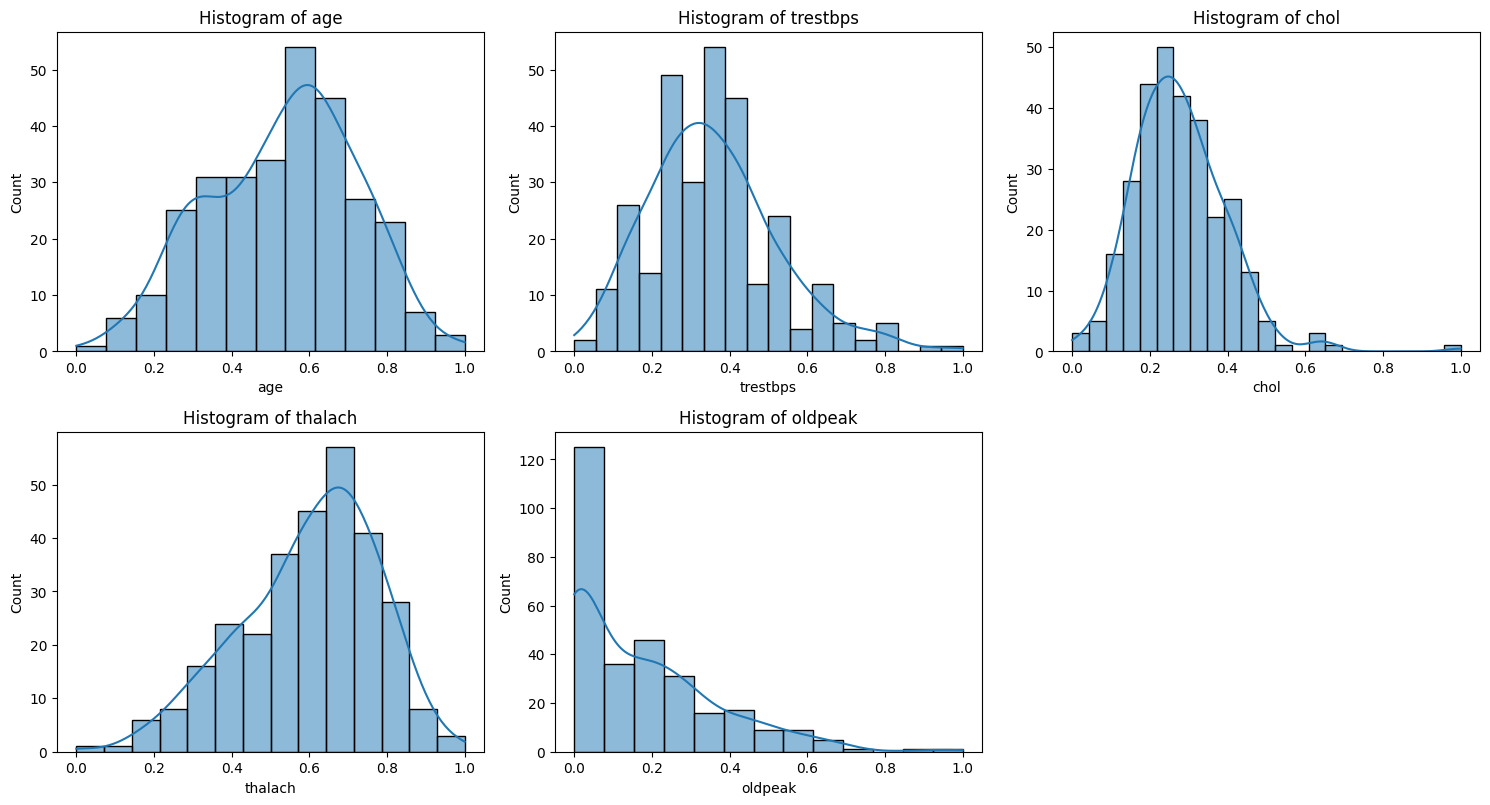

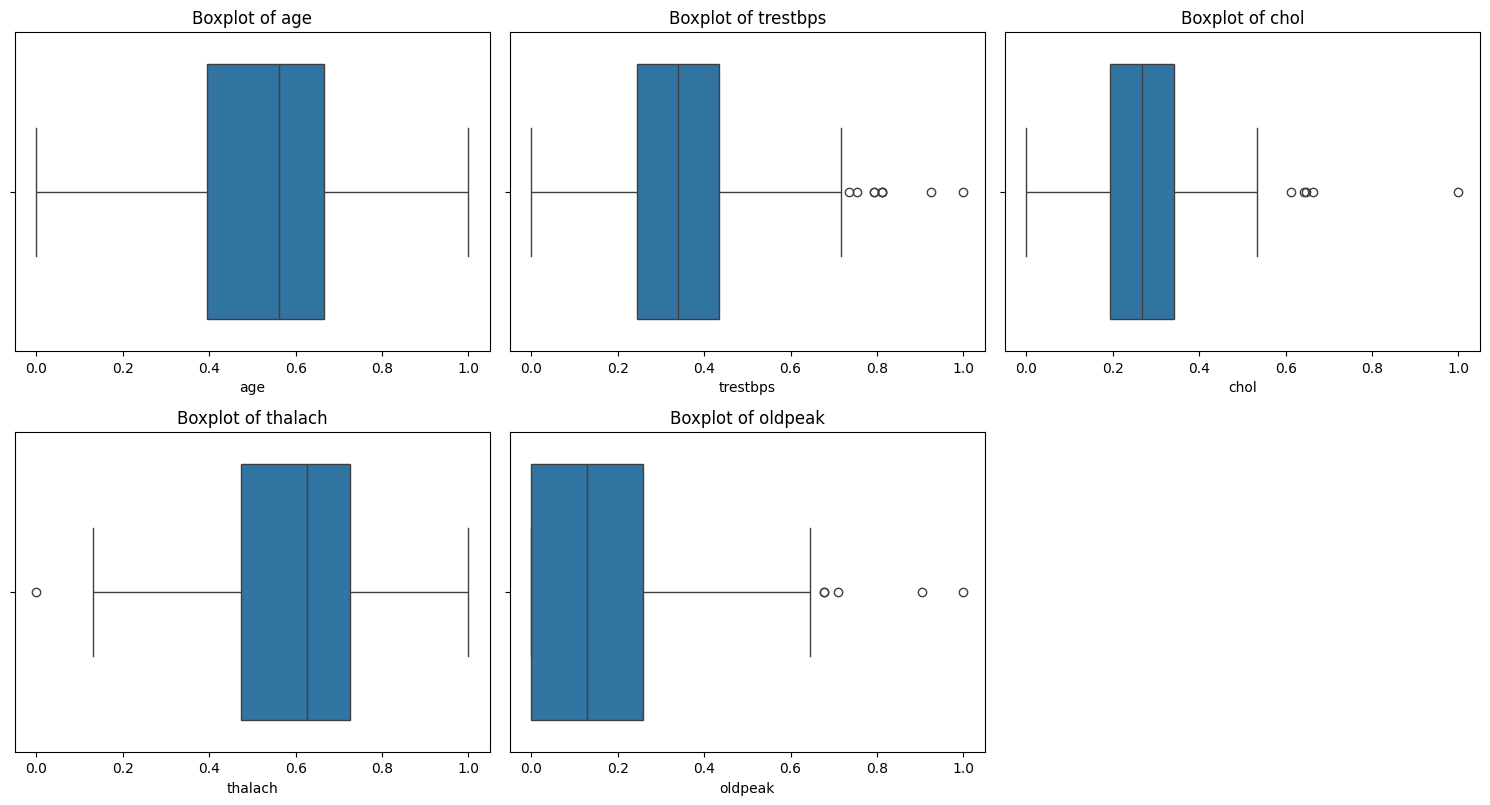

In [17]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 



#handling missing data(dropping NaN)
df_combined=pd.concat([X,y],axis=1)
df_cleaned=df_combined.dropna()
data=df_cleaned.drop(columns=y.columns)
y=df_cleaned[y.columns]

print(f"Shape of X after handling missing values: {data.shape}")
print(f"Shape of y after handling missing values: {y.shape}")

# Verify no more missing values
print("\nMissing values in X after removal:")
print(data.isnull().sum().sum())
print("\nMissing values in y after removal:")
print(y.isnull().sum().sum())
#data.isnull().sum()
#data.duplicated().sum()

#perform data encoding(one-hot encoding)
#print(heart_disease.variables)  #to check wich column might be Categorical
categorial_cols=['sex','cp','fbs','restecg','exang','slope','ca','thal']
data_encoded=pd.get_dummies(data,columns=categorial_cols,drop_first=True,dtype=int)
print("\nFirst 5 rows of features (X) after One-Hot Encoding:")
print(data_encoded.head())
print(f"\nShape of X after One-Hot Encoding: {data_encoded.shape}")
encoded_feature_names = data_encoded.columns.tolist()

#Standarize numerical features
#identfy numerical columns
numerical_cols=data_encoded.select_dtypes(include=np.number).columns.tolist()
original_catagorial_cols_in_data=[col for col in categorial_cols if col in heart_disease.data.features.columns]
true_numerical_cols = []
for col in data_encoded.columns:
    if col in heart_disease.data.features.columns and col not in original_catagorial_cols_in_data:
        true_numerical_cols.append(col)

#apply MinMaxScaler
scaler = MinMaxScaler()
scaled_data_numerical=data_encoded[true_numerical_cols].copy()
scaled_data_numerical = scaler.fit_transform(scaled_data_numerical)
scaled_data_numerical_df = pd.DataFrame(scaled_data_numerical, columns=true_numerical_cols,index=data_encoded.index)
scaled_data=pd.concat([scaled_data_numerical_df,data_encoded.drop(columns=true_numerical_cols)],axis=1)

#%store scaled_data
#%store y

#plot EDA 

df_eda=pd.concat([scaled_data,y],axis=1)

#correlation heatmap
plt.figure(figsize=(18,14))
sns.heatmap(df_eda.corr(),annot=True,cmap='coolwarm',fmt='.1f',linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

n = len(scaled_data[true_numerical_cols])

# decide grid size (e.g., 3 columns wide)
ncols = 3
nrows = math.ceil(n / ncols)

# --- Histograms ---
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()  # flatten to 1D for easy iteration

for idx, col in enumerate(scaled_data[true_numerical_cols]):
    sns.histplot(data=scaled_data, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Histogram of {col}')

# remove unused subplots if any
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# --- Boxplots ---
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()

for idx, col in enumerate(scaled_data[true_numerical_cols]):
    sns.boxplot(data=scaled_data, x=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}')

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
#print(scaled_data)

Converintg y data to binary 1-> heart disesae / 0-> no heart disease

In [18]:
y_binary=y.apply(lambda x: 1 if x.iloc[0] >0 else 0,axis=1)

#convert y to binary dataframe 
y_binary=pd.DataFrame(y_binary,columns=['target'])

print("\nOriginal y head:")
print(y.head())
print("\nUnique values of original y:")
print(y.iloc[:, 0].unique()) # Use iloc[:, 0] to get unique values of the single column

print("\nBinary y head:")
print(y_binary.head())
print("\nUnique values of binary y:")
print(y_binary['target'].unique())

#---------important Step-------
y=y_binary


Original y head:
   num
0    0
1    2
2    1
3    0
4    0

Unique values of original y:
[0 2 1 3 4]

Binary y head:
   target
0       0
1       1
2       1
3       0
4       0

Unique values of binary y:
[0 1]


save Preprocessed data

In [19]:
import os
output_data_path = '../data_through_notes/' # Relative path to data folder from notebooks folder
os.makedirs(output_data_path, exist_ok=True)

scaled_data.to_csv(os.path.join(output_data_path, 'scaled_data.csv'), index=False)
y.to_csv(os.path.join(output_data_path, 'y_processed.csv'), index=False)

print(f"\nProcessed X saved to: {os.path.join(output_data_path, 'scaled_data.csv')}")
print(f"Processed y saved to: {os.path.join(output_data_path, 'y_processed.csv')}")


Processed X saved to: ../data_through_notes/scaled_data.csv
Processed y saved to: ../data_through_notes/y_processed.csv
